<a href="https://colab.research.google.com/github/linconsarker/machine-learning/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1️⃣ Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
sns.set(style="whitegrid")

In [ ]:
# 2️⃣ Load dataset
california = fetch_california_housing(as_frame=True)
df = california.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# 3️⃣ Split features and target
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# 4️⃣ Fit Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept:", model.intercept_)

Intercept: -37.02327770606409


In [ ]:
coeff_df = pd.DataFrame(model.coef_, X_train.columns, columns=["Coefficient"])
coeff_df

,Coefficient
MedInc,0.448675
HouseAge,0.009724
AveRooms,-0.123323
AveBedrms,0.783145
Population,-0.000002
AveOccup,-0.003526
Latitude,-0.419792
Longitude,-0.433708


In [ ]:
# 5️⃣ Make Predictions and Evaluate
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R²:", r2)
print("RMSE:", rmse)

R²: 0.5757877060324508
RMSE: 0.7455813830127764


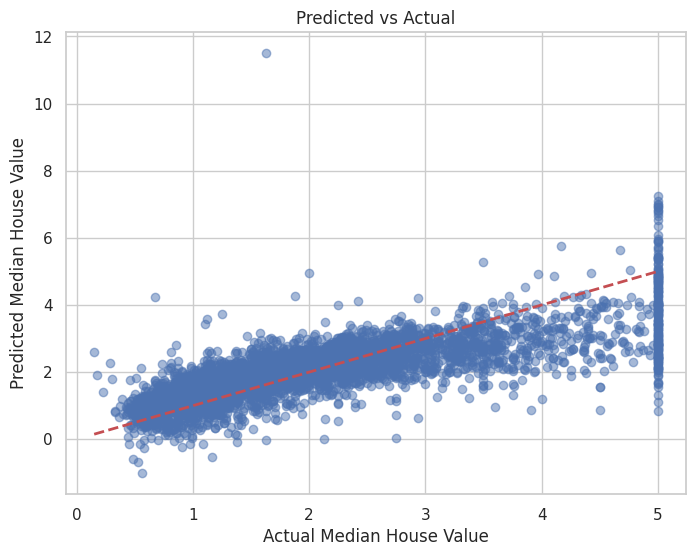

In [ ]:
# 6️⃣ Predicted vs Actual Plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Predicted vs Actual")
plt.show()


In [ ]:
# 7️⃣ Sample Prediction
sample = X_test.sample(1, random_state=1)
pred_val = model.predict(sample)[0]
print("Sample features:\n", sample)
print("Predicted Median House Value:", pred_val)


Sample features:
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
4309   1.676      44.0  3.672176   1.143251      2297.0  3.163912     34.09   

      Longitude  
4309    -118.32  
Predicted Median House Value: 1.5888280489837285


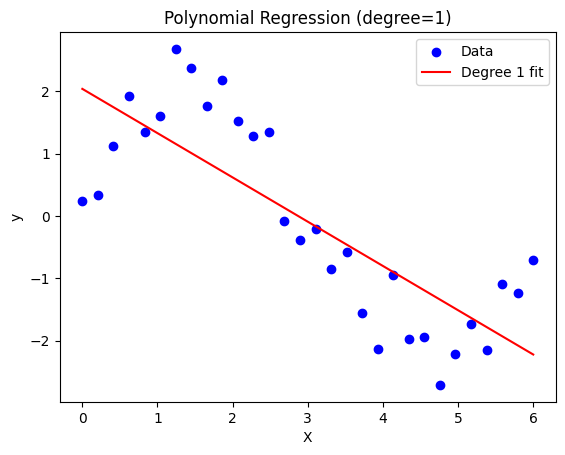

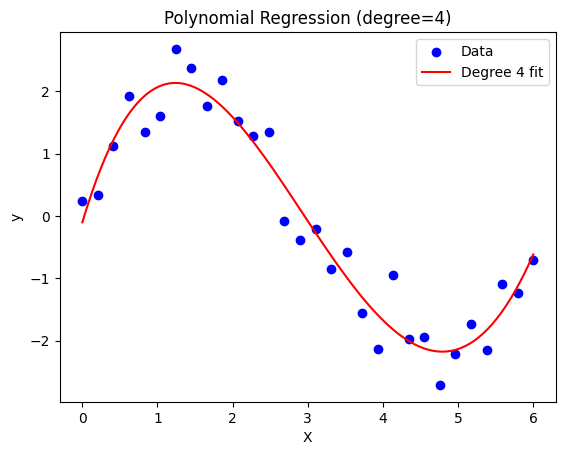

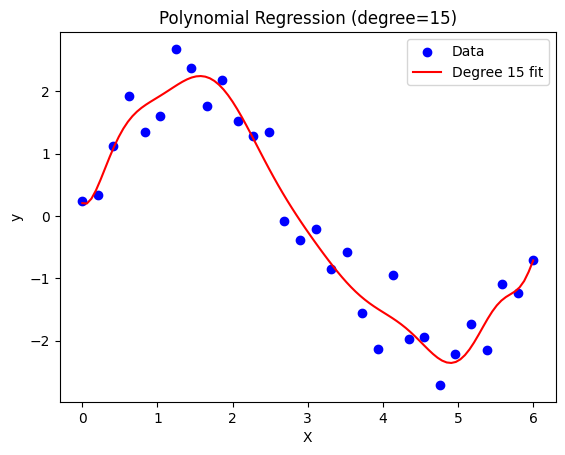

In [10]:
# Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Step 2: Create synthetic dataset
np.random.seed(42)
X = np.linspace(0, 6, 30).reshape(-1, 1)  # feature
y = 2 * np.sin(X).ravel() + np.random.randn(30) * 0.5  # target with noise

# Function to plot polynomial regression
def plot_poly_fit(degree, X, y):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)

    # Predict on a smooth curve
    X_fit = np.linspace(0, 6, 100).reshape(-1, 1)
    X_fit_poly = poly.transform(X_fit)
    y_pred = model.predict(X_fit_poly)

    # Plot
    plt.scatter(X, y, color="blue", label="Data")
    plt.plot(X_fit, y_pred, color="red", label=f"Degree {degree} fit")
    plt.title(f"Polynomial Regression (degree={degree})")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.show()

# Step 3: Show different fits
plot_poly_fit(1, X, y)   # Underfitting (linear)
plot_poly_fit(4, X, y)   # Good fit
plot_poly_fit(15, X, y)  # Overfitting


In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Create 30 numbers between 0 and 6
X = np.linspace(0, 6, 30)
y = 2 * X + 1   # simple linear relation (no noise)

print("Original X shape:", X.shape)  # (30,)

# Try different reshapes
shapes = {
    "X.reshape(-1, 1)": X.reshape(-1, 1),
    "X.reshape(30, 1)": X.reshape(30, 1),
    "X.reshape(1, -1)": X.reshape(1, -1),
    "X.reshape(-1,)": X.reshape(-1,),
}

# Train model on each reshaped X
for name, X_reshaped in shapes.items():
    print(f"\n{name} -> shape {X_reshaped.shape}")
    try:
        model = LinearRegression()
        model.fit(X_reshaped, y)
        print("✅ Model trained successfully.")
    except Exception as e:
        print("❌ Error:", e)


Original X shape: (30,)

X.reshape(-1, 1) -> shape (30, 1)
✅ Model trained successfully.

X.reshape(30, 1) -> shape (30, 1)
✅ Model trained successfully.

X.reshape(1, -1) -> shape (1, 30)
❌ Error: Found input variables with inconsistent numbers of samples: [1, 30]

X.reshape(-1,) -> shape (30,)
❌ Error: Expected 2D array, got 1D array instead:
array=[0.         0.20689655 0.4137931  0.62068966 0.82758621 1.03448276
 1.24137931 1.44827586 1.65517241 1.86206897 2.06896552 2.27586207
 2.48275862 2.68965517 2.89655172 3.10344828 3.31034483 3.51724138
 3.72413793 3.93103448 4.13793103 4.34482759 4.55172414 4.75862069
 4.96551724 5.17241379 5.37931034 5.5862069  5.79310345 6.        ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
